#### **NIVEL 1**

Conexión MySQL - Python

In [10]:
import mysql.connector



connection = mysql.connector.connect(host='localhost',
                                         database='Bussines',
                                         user='root',
                                         password='Peanuts@1991')
if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

else:
    print("Error while connecting to MySQL")


Connected to MySQL Server version  8.0.35
You're connected to database:  ('bussines',)


In [ ]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Connect to the MySQL database
conn = mysql.connector.connect(host='localhost',
                                         database='Bussines',
                                         user='root',
                                         password='Peanuts@1991'
)

query = "SELECT AVG(amount) FROM transaction"
cursor = conn.cursor()
cursor.execute(query)

data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)



EX4

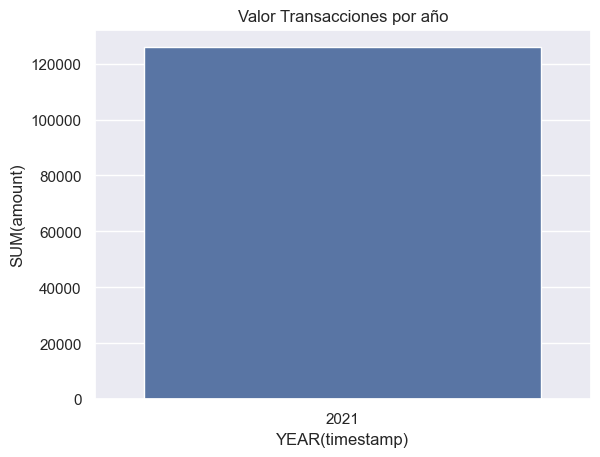

In [15]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Connect to the MySQL database
conn = mysql.connector.connect(host='localhost',
                                         database='Bussines',
                                         user='root',
                                         password='Peanuts@1991'
)

# Step 2: Fetch data from the database
query = "SELECT YEAR(timestamp), SUM(amount) FROM transaction GROUP BY YEAR(timestamp)"
cursor = conn.cursor()
cursor.execute(query)

# Step 3: Load data into a Pandas DataFrame
data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)

# Step 4: Use Seaborn to create visualizations
# Example plot: Bar plot
sns.barplot(x="YEAR(timestamp)", y="SUM(amount)", data=df)
plt.title("Valor Transacciones por año")
plt.xlabel("YEAR(timestamp)")
plt.ylabel("SUM(amount)")
plt.show()

# Close cursor and connection
cursor.close()
conn.close()